<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826312 sha256=13a37761d97bb976d835590cabbcfebbafe492530784bd10903eac480a690437
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437405 sha256=2bd9f6163f85faeadbea54f9c79cfec21fa8e1f2f692a47fe9d59cfa70f69a05
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [458]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60", count=350)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-03-25 14:00:00  36662000.0  36683000.0  36570000.0  36659000.0   
2023-03-25 15:00:00  36658000.0  36849000.0  36627000.0  36710000.0   
2023-03-25 16:00:00  36710000.0  36808000.0  36694000.0  36722000.0   
2023-03-25 17:00:00  36714000.0  36740000.0  36579000.0  36618000.0   
2023-03-25 18:00:00  36618000.0  36709000.0  36510000.0  36662000.0   
...                         ...         ...         ...         ...   
2023-04-10 08:00:00  37385000.0  37470000.0  37312000.0  37313000.0   
2023-04-10 09:00:00  37331000.0  37615000.0  37310000.0  37568000.0   
2023-04-10 10:00:00  37568000.0  37569000.0  37416000.0  37503000.0   
2023-04-10 11:00:00  37504000.0  37517000.0  37461000.0  37489000.0   
2023-04-10 12:00:00  37490000.0  37496000.0  37467000.0  37484000.0   

                         volume         value  
2023-03-25 14:00:00  175.915005  6.443038e+09  
2023-03-25 15:00:00  315.666792  1.160348e+10  
202

In [459]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-03-25 14:00:00,36659000.0
1,2023-03-25 15:00:00,36710000.0
2,2023-03-25 16:00:00,36722000.0
3,2023-03-25 17:00:00,36618000.0
4,2023-03-25 18:00:00,36662000.0
...,...,...
375,2023-04-10 08:00:00,37313000.0
376,2023-04-10 09:00:00,37568000.0
377,2023-04-10 10:00:00,37503000.0
378,2023-04-10 11:00:00,37489000.0


In [460]:
#prophet 불러옴
from fbprophet import Prophet

In [461]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [462]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=55, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


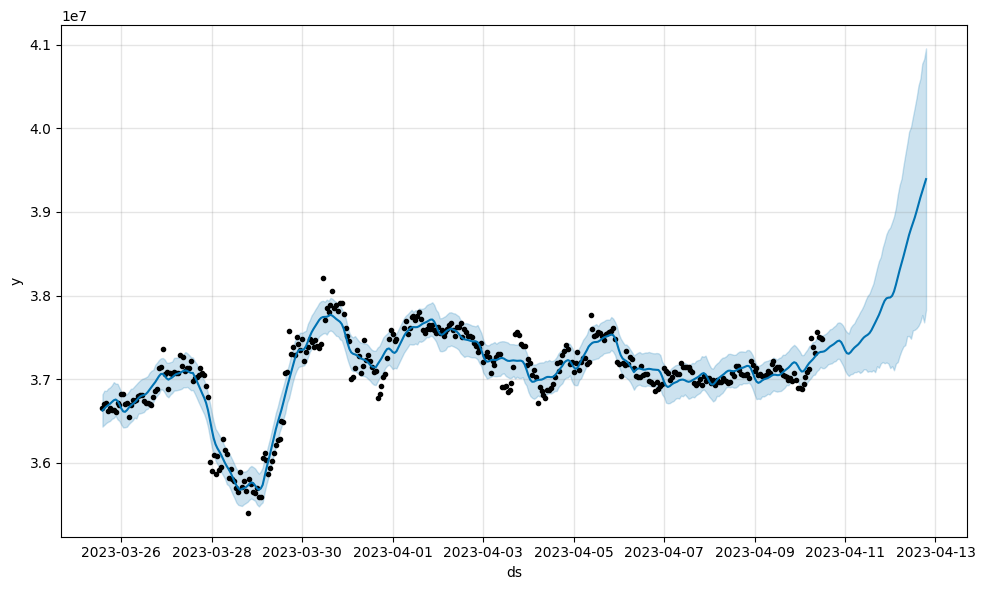

In [463]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


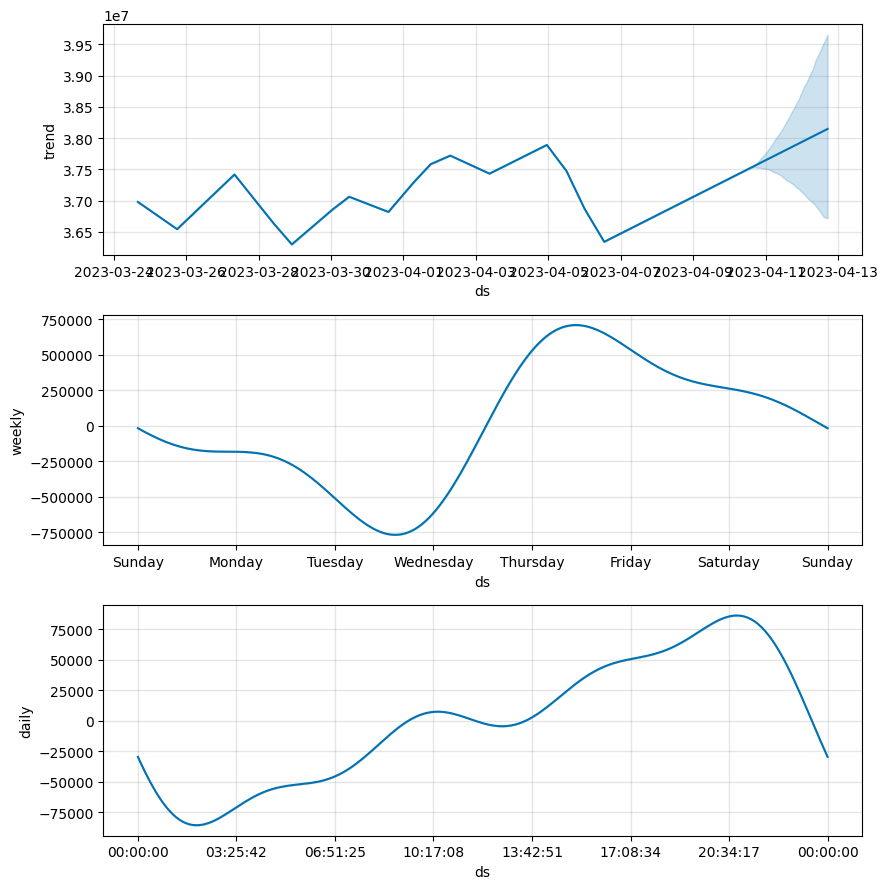

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)